<a href="https://colab.research.google.com/github/KurniawatiAgustina/PCVK/blob/main/Week_6_3A_15_Kurniawati_Agustina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Folder dari Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **2. Import Library**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

**3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart**

<BarContainer object of 256 artists>

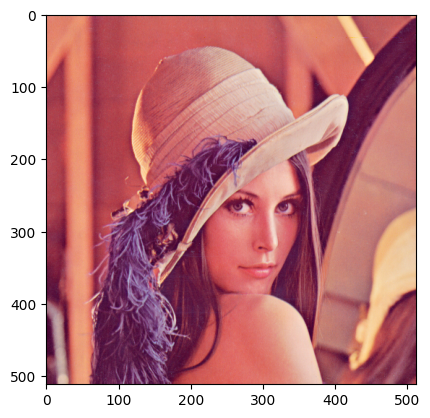

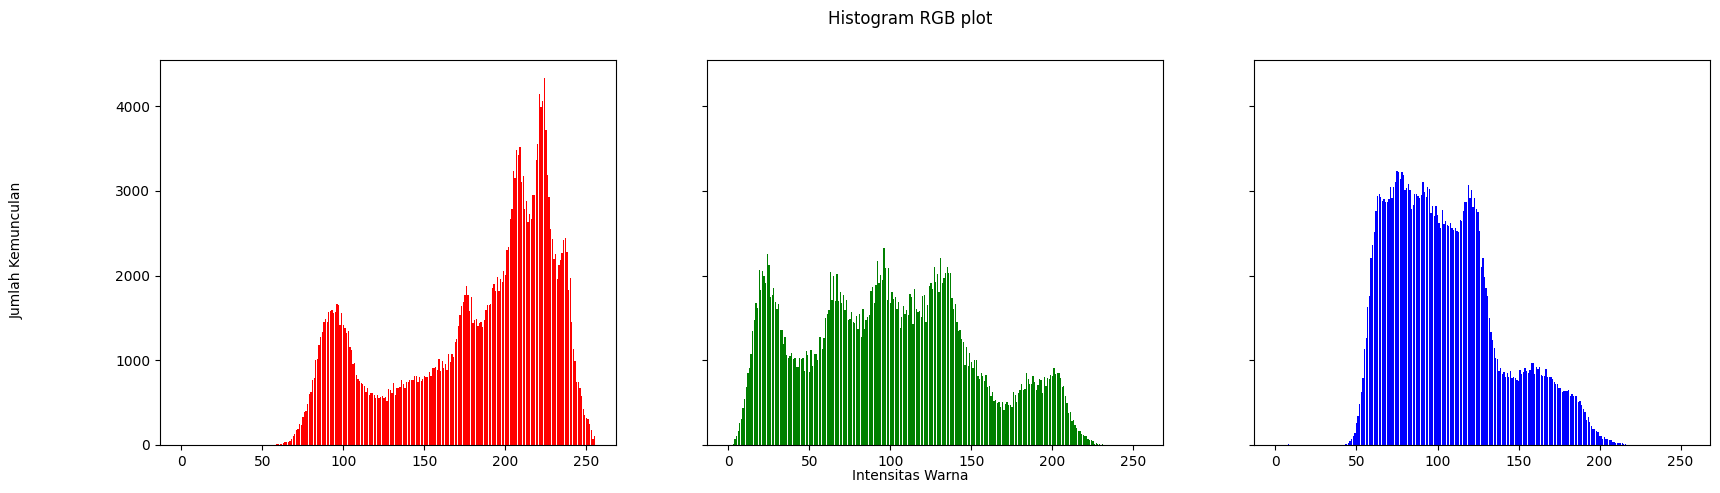

In [15]:
img_1 = cv.imread('/content/drive/MyDrive/Lenna.png')
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

height, width, depth = np.shape(img_1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

**4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**

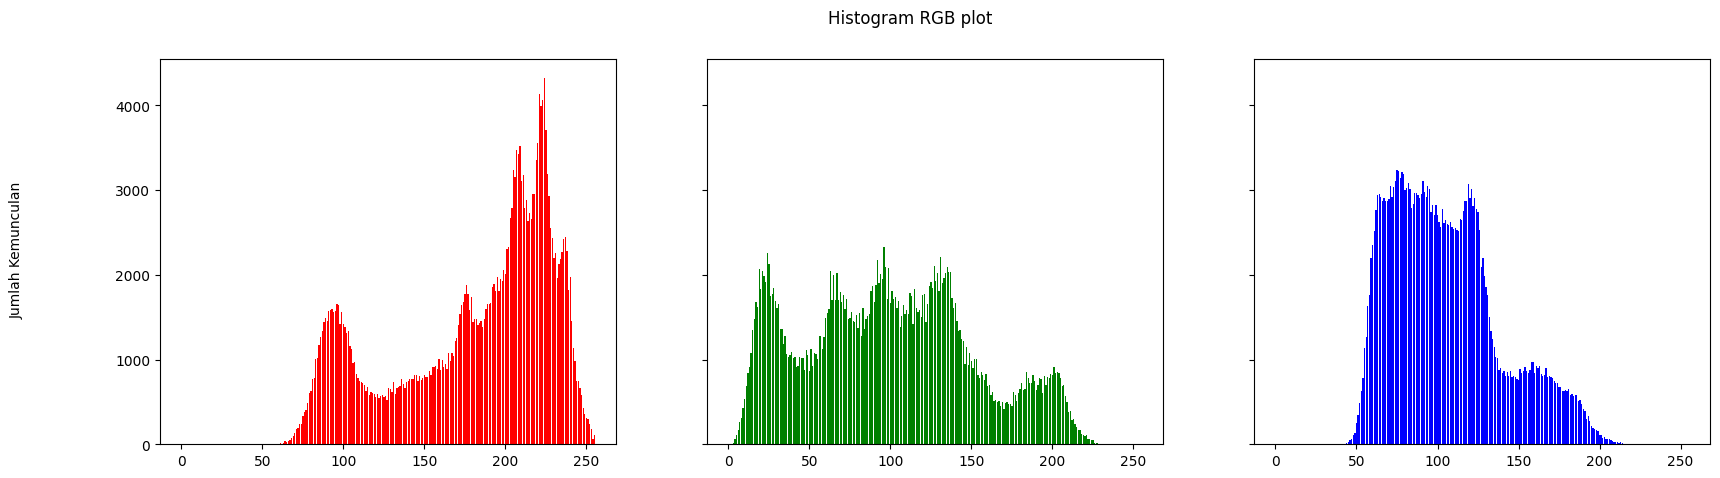

In [16]:
# Baca citra
img = cv.imread('/content/drive/MyDrive/Lenna.png')

# Memisahkan komponen warna (merah, hijau, biru)
(blue, green, red) = cv.split(img)

# Fungsi untuk menghitung histogram menggunakan library NumPy
def getIntensity(image):
    intensity, _ = np.histogram(image, bins=256, range=(0, 256))
    return intensity

# Fungsi untuk membuat plot histogram
def createBarPlot(image, color, ax):
    ax.bar(color_range, getIntensity(image), color=color)

color_range = np.arange(256)  # Rentang warna gambar

# Membuat subplot untuk masing-masing saluran warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

createBarPlot(red, 'Red', axs[0])
createBarPlot(green, 'Green', axs[1])
createBarPlot(blue, 'Blue', axs[2])

plt.show()

**Jawaban : Setelah dilakukan perbandingan ternyata output nya sama.**

**5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart**

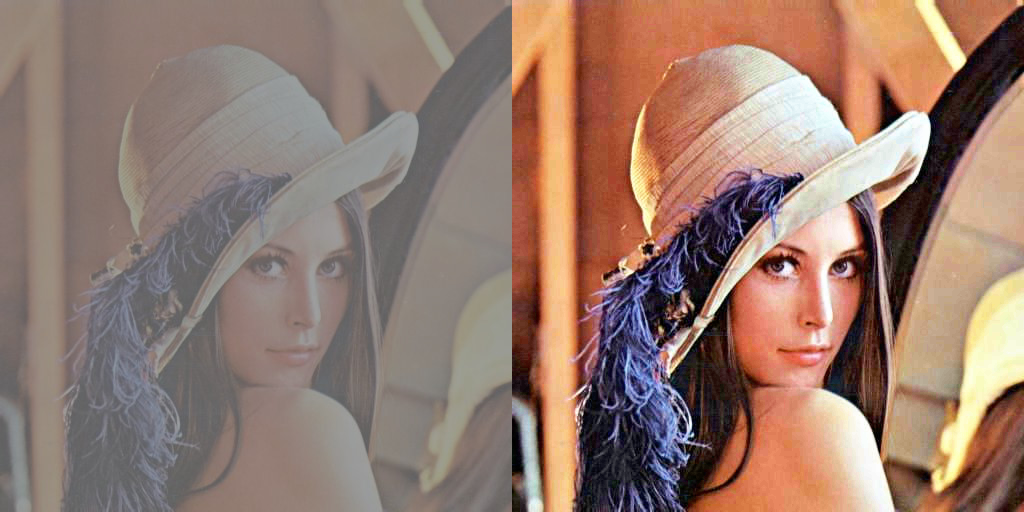

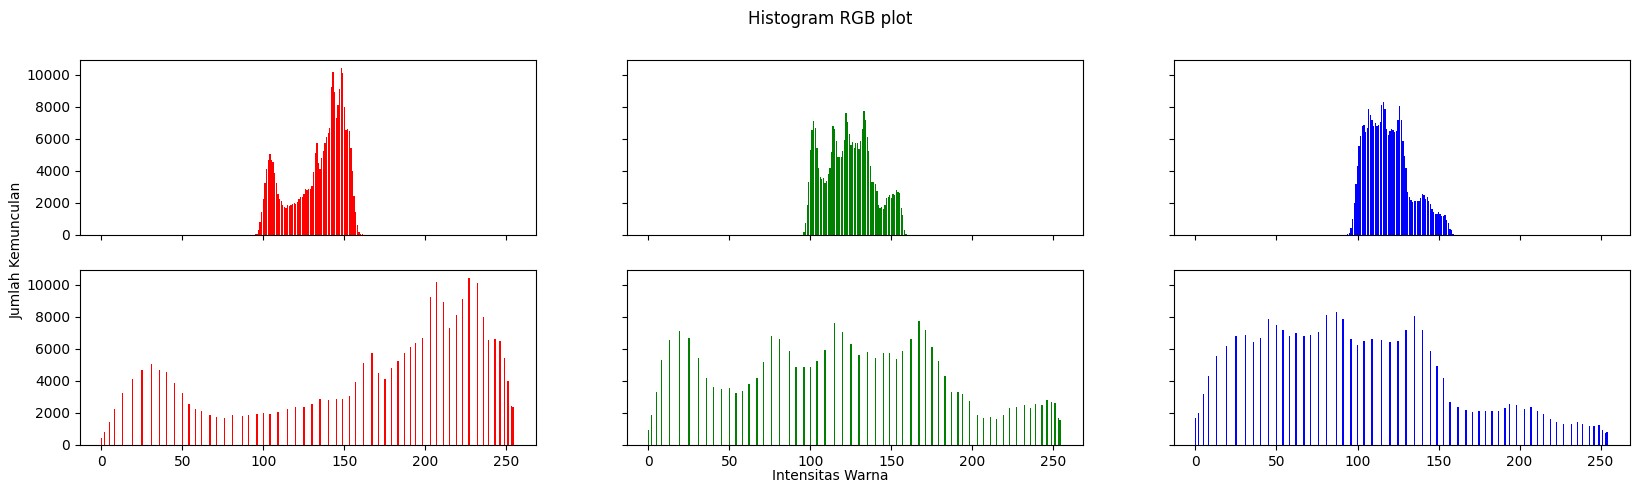

In [18]:
img1 = cv.imread('/content/drive/MyDrive/lena_lc.jpg')

def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3, 256))
  for y in range(0, height):
    for x in range(0, width):
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

# Konversi ke Numpy array
img_array = np.asarray(img1)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisais
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))  # Menggabungkan gambar
cv2_imshow(final_frame)

color_ranges = np.arange(256)

# Mengonversi gambar asli menjadi grayscale
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

is_gray_img = np.array_equal(img1_gray, img2_gray)

if not is_gray_img:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(color_ranges, histo_asli[2], color='red')
    axs[0, 1].bar(color_ranges, histo_asli[1], color='green')
    axs[0, 2].bar(color_ranges, histo_asli[0], color='blue')
    axs[1, 0].bar(color_ranges, equal_histo[2], color='red')
    axs[1, 1].bar(color_ranges, equal_histo[1], color='green')
    axs[1, 2].bar(color_ranges, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(color_ranges, histo_asli[2], color='gray')
    axs[1].bar(color_ranges, equal_histo[2], color='gray')

plt.show()

**6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?**

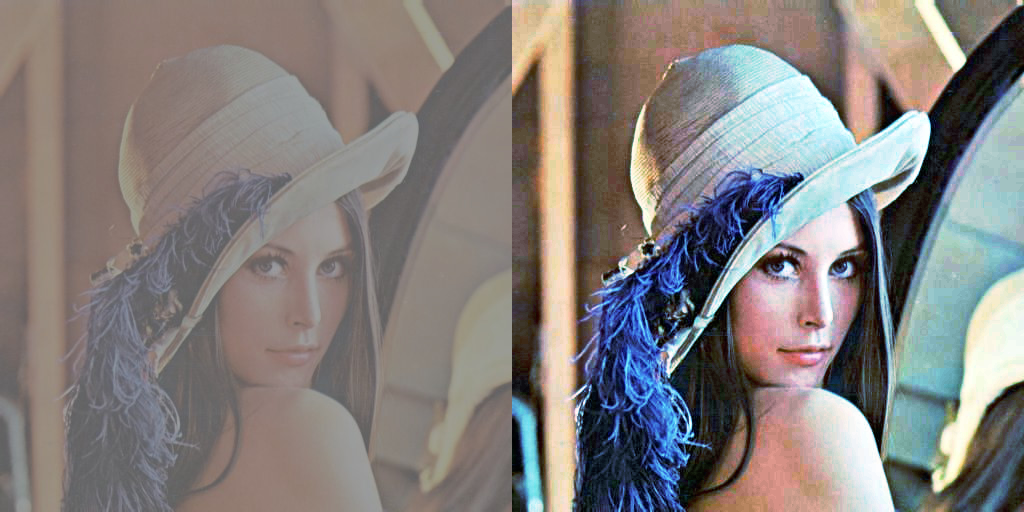

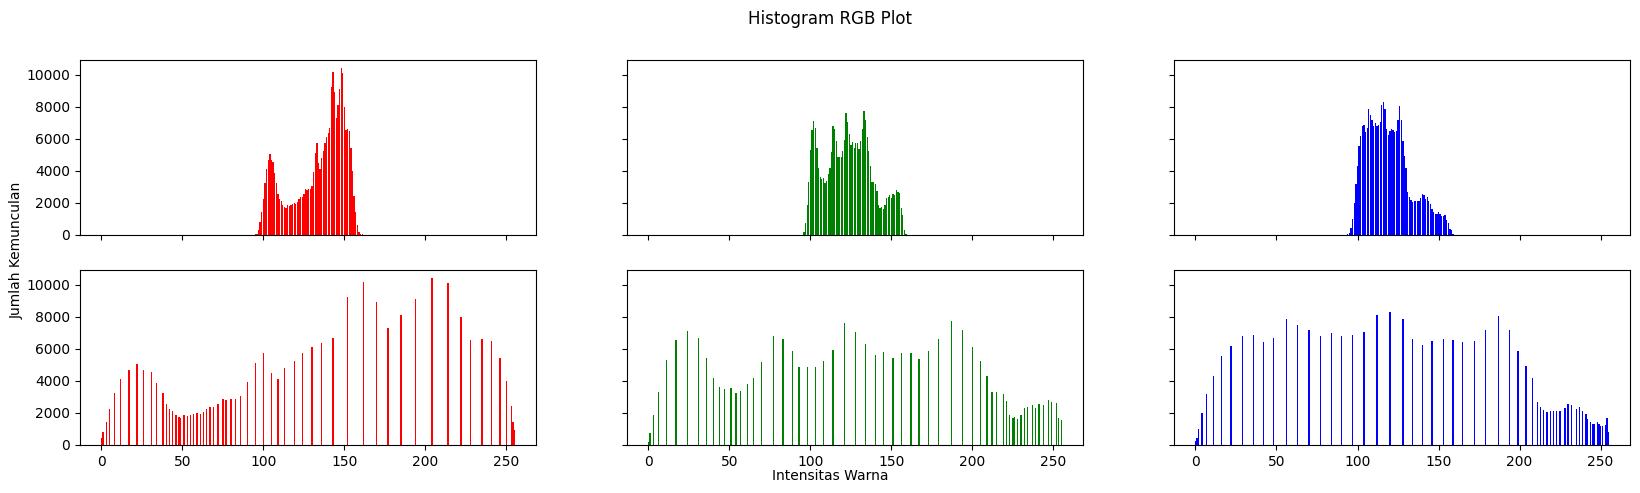

In [19]:
# Equalize Histogram for each color channel separately
eq_channels = [cv.equalizeHist(ch) for ch in cv.split(img1)]
eq_img1 = cv.merge(eq_channels)

# Calculate histogram for the equalized image
eq_histo = histog(eq_img1)

# Display the equalized image
final_frame = cv.hconcat((img1, eq_img1))  # Menggabungkan gambar
cv2_imshow(final_frame)

# Compare histograms before and after equalization
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(color_ranges, histo_asli[2], color='red')
axs[0, 1].bar(color_ranges, histo_asli[1], color='green')
axs[0, 2].bar(color_ranges, histo_asli[0], color='blue')
axs[1, 0].bar(color_ranges, eq_histo[2], color='red')
axs[1, 1].bar(color_ranges, eq_histo[1], color='green')
axs[1, 2].bar(color_ranges, eq_histo[0], color='blue')

plt.show()

plt.show()


**Jawaban : Hasilnya berbeda warna rambut pada soal no 5 berwarna ungu, soal no 6 rambut berwarna biru.**

**7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg**

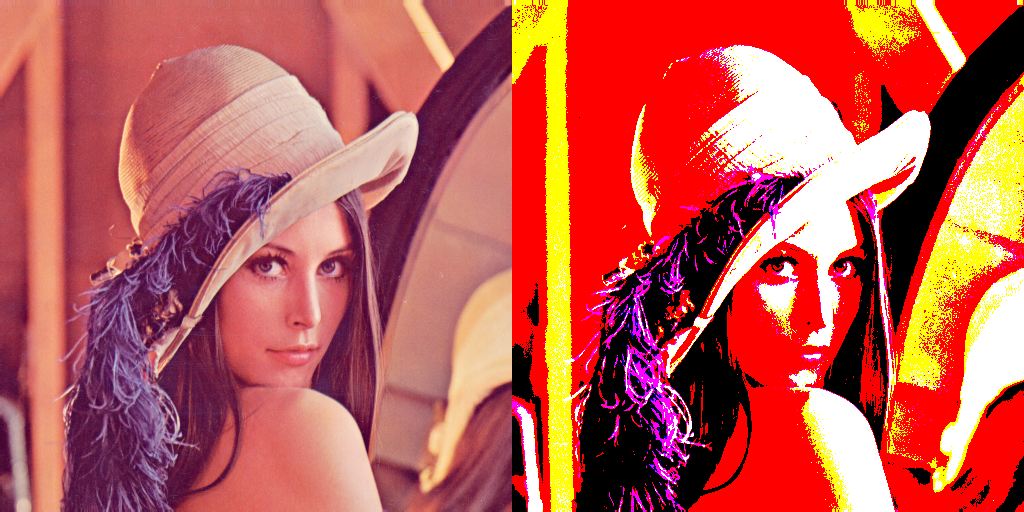

In [20]:
img_1 = cv.imread('/content/drive/MyDrive/Lenna.png')
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

**8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)**

In [21]:
pip install pillow

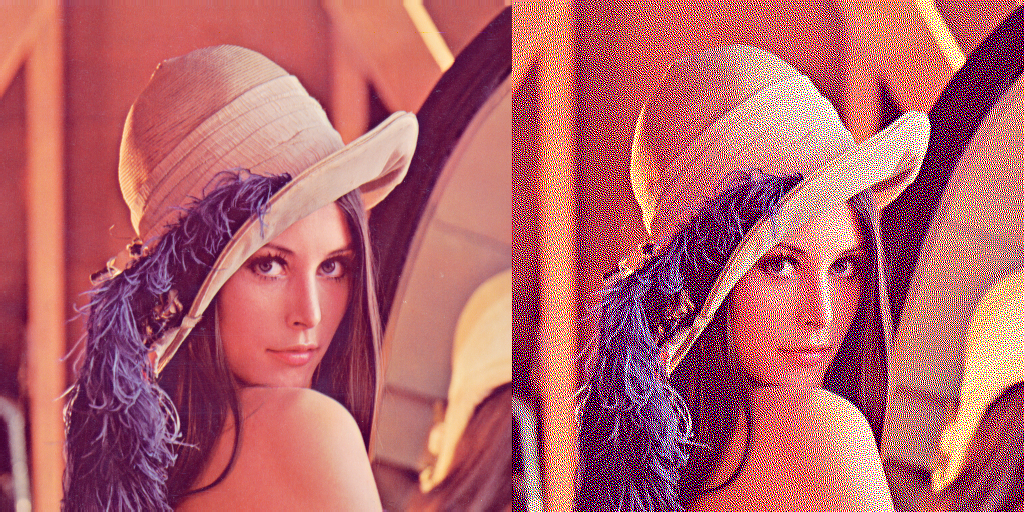

In [22]:
img = cv.imread('/content/drive/MyDrive/Lenna.png')

# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
final_frame = cv.hconcat((img, output_img))
cv2_imshow(final_frame)

**9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!**

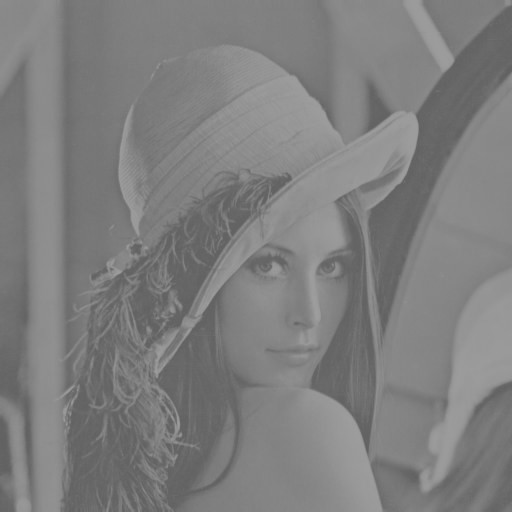

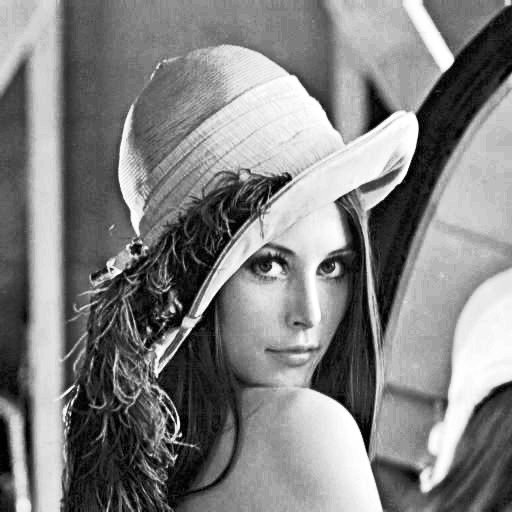

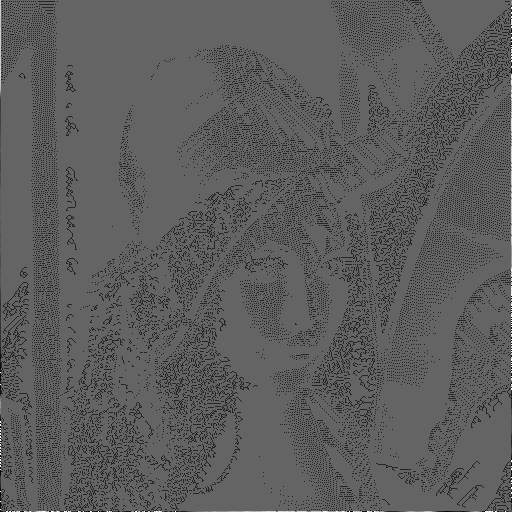

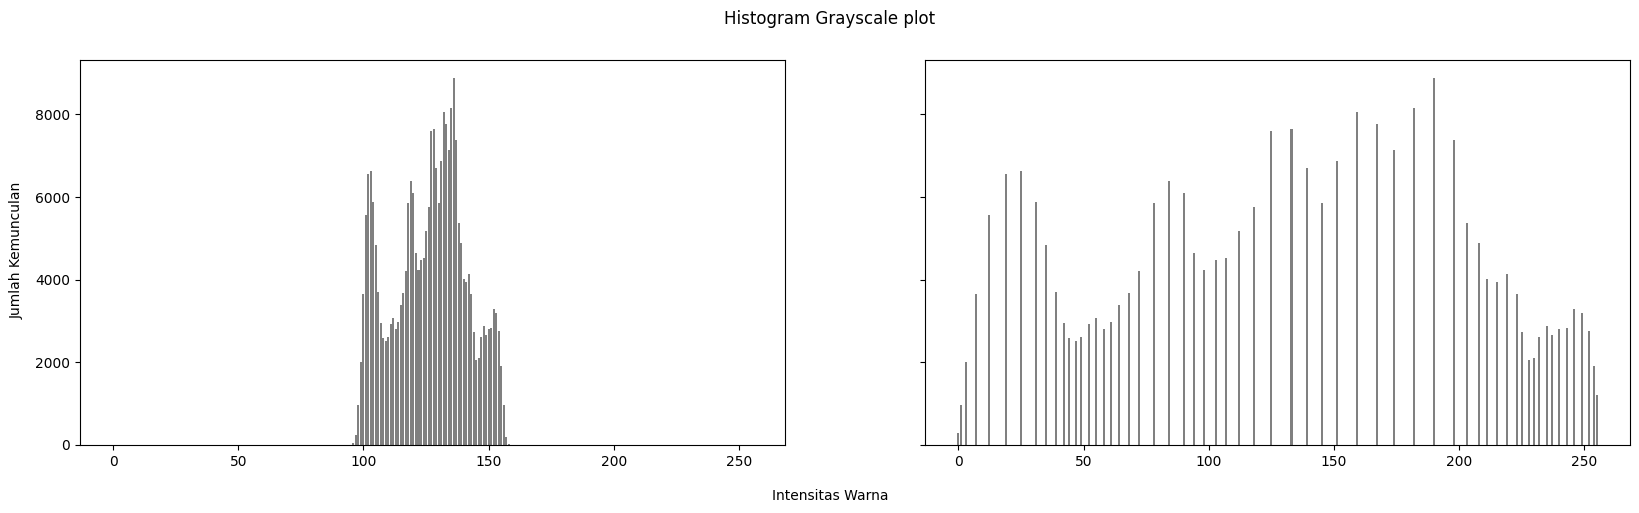

In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Baca citra asli
image = cv2.imread("/content/drive/MyDrive/lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)